#3차시 대체 과제: 18102018 최호준

In [20]:
#!pip install konlpy

In [21]:
from konlpy.tag import Twitter
from pprint import pprint

In [22]:
#https://news.naver.com/main/read.nhn?mode=LPOD&mid=sec&oid=001&aid=0011897702&isYeonhapFlash=Y&rc=N
news = """(서울=연합뉴스) 설승은 기자 = 정세균 국무총리가 22일 총리실 직원의 신종 코로나바이러스 감염증(코로나19) 확진 판정에 따라 일정을 취소하고 검체 검사를 받았다.

정 총리는 이날 오전 국무회의를 마친 뒤 총리실 민정실 A국장이 코로나19 양성 판정을 받았다는 소식을 접하고, 검체 검사를 받기 위해 서울 종로구 보건소를 찾았다.

정 총리는 지난주 A국장을 접촉한 일이 없어 밀접접촉자로 분류되지는 않지만, 선제적으로 검체 검사를 받은 뒤 삼청동 공관에서 대기 중이라는 것이 총리실의 설명이다.

총리실 관계자는 "정 총리가 지난주 A국장을 만난 적이 없고, 지난주 수요일(16일) 이후 접촉한 적이 없어 밀접접촉자가 아니라는 통보를 방역 당국에서 들은 것으로 안다"고 밝혔다.

그러나 정 총리는 이날 오후 추석 방역현장 점검을 위해 하나로마트 양재점을 방문하려던 일정을 취소했다. 국민의힘 원내대표단과의 만찬 일정이 연기될 수도 있다.

정 총리의 코로나19 검사 결과는 오후 6시께 나올 예정이다.

검사 결과에 따라 문재인 대통령도 검사 대상이 될 수 있다. 정 총리가 전날 청와대에서 문 대통령과 주례회동을 한 데 따른 것이다.

이날 국무회의는 화상회의 방식으로 열려 문 대통령은 청와대에서, 정 총리는 정부서울청사에서 각각 참여했다.

A국장은 정 총리의 측근으로, 지난 7일 접촉한 사람이 확진을 받았다는 소식을 듣고 전날 검체검사를 받았으며 이날 오전 확진 통보를 받았다."""

In [23]:
news = news.replace("\n", " ")

In [ ]:
t = Twitter()
news_twitter = t.pos(news)
pprint(news_twitter)

In [25]:
pos = ['/'.join(i) for i in t.pos(news)]
pprint(pos[0:10])

['(/Punctuation',
 '서울/Noun',
 '=/Punctuation',
 '연합뉴스/Noun',
 ')/Punctuation',
 '설/Noun',
 '승은/Noun',
 '기자/Noun',
 '=/Punctuation',
 '정세균/Noun']


In [26]:
pos_nouns = ['/'.join(i) for i in t.pos(news) if i[1]=='Noun']
pprint(pos_nouns[0:10])

['서울/Noun',
 '연합뉴스/Noun',
 '설/Noun',
 '승은/Noun',
 '기자/Noun',
 '정세균/Noun',
 '국무총리/Noun',
 '총리실/Noun',
 '직원/Noun',
 '신종/Noun']


In [27]:
import nltk

In [28]:
nouns = nltk.Text(pos_nouns)
nouns

<Text: 서울/Noun 연합뉴스/Noun 설/Noun 승은/Noun 기자/Noun 정세균/Noun 국무총리/Noun 총리실/Noun...>

In [ ]:
print(type(nouns.tokens))
pprint(nouns.tokens)

In [30]:
print("문서에 나온 토큰(명사) 종류 수: ", len(set(nouns.tokens)))
pprint(nouns.vocab().most_common(10))

문서에 나온 토큰(명사) 종류 수:  89
[('정/Noun', 8),
 ('총리/Noun', 8),
 ('검사/Noun', 7),
 ('접촉/Noun', 5),
 ('총리실/Noun', 4),
 ('검체/Noun', 4),
 ('날/Noun', 4),
 ('국장/Noun', 4),
 ('서울/Noun', 3),
 ('코로나/Noun', 3)]


In [31]:
%matplotlib inline
from matplotlib import font_manager, rc
font_fname = 'c:/windows/fonts/gulim.ttc'     # A font of your choice
font_name = font_manager.FontProperties(fname=font_fname).get_name()
rc('font', family='Gulim')

FileNotFoundError: ignored

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44160 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51217 missing from current font.
  font.set_

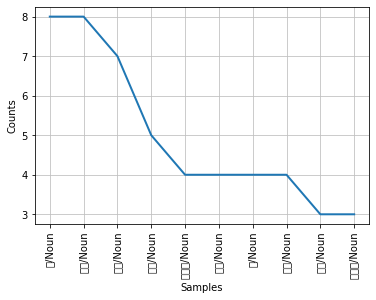

In [32]:
nouns.plot(10)

##Stemming = True

In [33]:
tokens = t.morphs(news, stem=True)

In [34]:
token = nltk.Text(tokens, name="코로나 뉴스")

In [35]:
token

<Text: 코로나 뉴스>

In [36]:
print("토큰 수: ", len(tokens))
print("토큰 종류 수: ", len(set(tokens)))
token.vocab()

토큰 수:  302
토큰 종류 수:  139


FreqDist({'"': 2,
          '(': 3,
          ')': 3,
          ',': 5,
          '.': 11,
          '16일': 1,
          '19': 3,
          '22일': 1,
          '6시': 1,
          '7일': 1,
          '=': 2,
          'A': 4,
          '가': 4,
          '각각': 1,
          '감염증': 1,
          '검사': 7,
          '검체': 4,
          '것': 3,
          '결과': 2,
          '고': 1,
          '공관': 1,
          '과': 1,
          '과의': 1,
          '관계자': 1,
          '국무총리': 1,
          '국무회의': 2,
          '국민': 1,
          '국장': 4,
          '그러나': 1,
          '기자': 1,
          '께': 1,
          '나오다': 1,
          '날': 4,
          '는': 7,
          '단': 1,
          '당국': 1,
          '대기': 1,
          '대상': 1,
          '대통령': 3,
          '데': 1,
          '도': 1,
          '되다': 3,
          '뒤': 2,
          '듣다': 1,
          '들다': 1,
          '따르다': 3,
          '라는': 1,
          '로': 1,
          '를': 8,
          '마치다': 1,
          '만난': 1,
          '만찬': 1,
          '문': 2,


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47484 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_

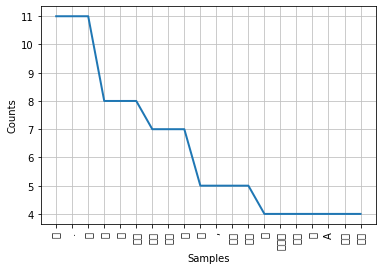

In [37]:
token.plot(20)

In [38]:
token.count('받다')

7

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48155 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45208 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_

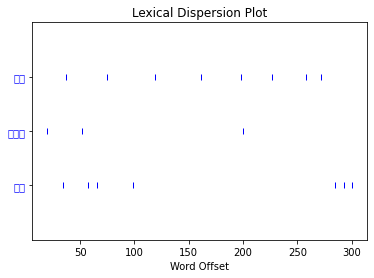

In [39]:
token.dispersion_plot(["총리","코로나","받다"])

##Stemming = False

In [40]:
tokens2 = t.morphs(news)

In [41]:
token2 = nltk.Text(tokens2, name="코로나 뉴스")

In [42]:
print("토큰 수: ", len(tokens2))
print("토큰 종류 수: ", len(set(tokens2)))
token2.vocab()

토큰 수:  302
토큰 종류 수:  147


FreqDist({'"': 2,
          '(': 3,
          ')': 3,
          ',': 5,
          '.': 11,
          '16일': 1,
          '19': 3,
          '22일': 1,
          '6시': 1,
          '7일': 1,
          '=': 2,
          'A': 4,
          '가': 4,
          '각각': 1,
          '감염증': 1,
          '검사': 7,
          '검체': 4,
          '것': 3,
          '결과': 2,
          '고': 1,
          '공관': 1,
          '과': 1,
          '과의': 1,
          '관계자': 1,
          '국무총리': 1,
          '국무회의': 2,
          '국민': 1,
          '국장': 4,
          '그러나': 1,
          '기자': 1,
          '께': 1,
          '나올': 1,
          '날': 4,
          '는': 7,
          '단': 1,
          '당국': 1,
          '대기': 1,
          '대상': 1,
          '대통령': 3,
          '데': 1,
          '도': 1,
          '되지는': 1,
          '될': 2,
          '뒤': 2,
          '듣고': 1,
          '들은': 1,
          '따라': 2,
          '따른': 1,
          '라는': 1,
          '로': 1,
          '를': 8,
          '마친': 1,
          '만난': 1,
  

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51012 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47484 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_

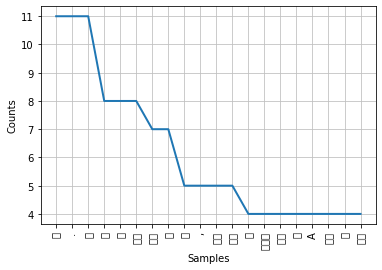

In [43]:
token2.plot(20)

In [44]:
token2.count("받다")

0

In [45]:
#Stemming O,X 비교
print("Stemming O 토큰 종류 수: ", len(set(tokens)))
print("Stemming X 토큰 종류 수: ", len(set(tokens2)))
print("\n'받다'개수: ")
print("Stemming O : ", token.count('받다'))
print("Stemming X : ", token2.count('받다'))

Stemming O 토큰 종류 수:  139
Stemming X 토큰 종류 수:  147

'받다'개수: 
Stemming O :  7
Stemming X :  0
